Exemplos Titanic.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
train_df = pd.read_csv('titanic/train.csv')
example_series =  pd.Series([1,5,10,30,50,30,15,40,45])

In [62]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [65]:
train_df.shape

(891, 12)

In [66]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
#como podemos tirar a media das idades ?
round(np.mean(train_df['Age']),3)

29.699

In [72]:
#qual foi a maior tarifa e a menor tarifa ?
np.max(train_df['Fare'])

512.3292

In [74]:
np.min(train_df['Fare'])

0.0

In [77]:
#qual a média de idades dos homens e das mulheres
round(train_df[['Sex', 'Age']].groupby('Sex').mean(),2)

,Age
Sex,
female,27.92
male,30.73


In [79]:
#quantos homens sobreviveram e qual foi a média de idade dos homens que sobreviveram e que morreram ?
round(np.mean(train_df['Age'].loc[(train_df.Survived == 1) & (train_df.Sex == 'male')]),2)

27.28

In [80]:
round(np.mean(train_df['Age'].loc[(train_df.Survived == 0) & (train_df.Sex == 'male')]),2)

31.62

In [81]:
#desafio: veja a média de idade das mulheres que sobreviveram e foram embarcadas como S
round(np.mean(train_df['Age'].loc[(train_df.Survived == 1) & (train_df.Sex == 'female') & (train_df.Embarked == 'S')]),2)

29.0

<b>Mediana e Quantil:</b> <br>

A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição. Na prática, se o número de observações na distribuição é ímpar, ele é o valor central, e se o número de observações é par, ele será a média das duas observações mais centrais. Vejamos abaixo:

In [12]:
print(train_df['Age'].median())
print(example_series.median())

28.0
30.0


In [13]:
#Faça a mediana do valor da tarifa.

A mediana é um conceito menos suscetível a grandes valores discrepantes do que a média. Se o número de observações não é muito grande e você tem uma observação que é muito maior do que os outros, a sua média pode começar a ficar menos representativa com relação à maioria do seu grupo. Por exemplo, se você está analisando o rendimento de uma classe da faculdade e um deles é um milionário, enquanto o restante é o trabalhador médio da empresa, a mediana será, provavelmente, uma melhor representação dos rendimentos do grupo como um todo, uma vez que a média estará “contaminada” pelo valor discrepante.

Já o quantil pode ser entendido como uma generalização da mediana. O quantil é o valor abaixo do qual está um certo percentual dos dados. No caso da mediana, esse percentual é de 50%. Vejamos o código para o quantil, que pode ser calculado através da função quantile(). Esta função, por padrão, adota o percentual (representado através do parâmetro q) de 50%, ou seja, é uma mediana por padrão. Você pode configurar outros percentuais através deste mesmo parâmetro:

In [14]:
print(train_df['Age'].quantile())
print(example_series.quantile())

print(train_df['Age'].quantile(q=0.25))
print(example_series.quantile(q=0.25))

28.0
30.0
20.125
10.0


<b>Moda:</b> </br>
A moda é simples. Nada mais é que o valor que mais se repete dentro de um conjunto. No Pandas, a moda é calculada através da função mode(). Vejamos os exemplos:

In [16]:
print(train_df['Age'].mode())
print(example_series.mode())

0    24.0
dtype: float64
0    30
dtype: int64


<b>Medidas de Dispersão</b> <br>

As medidas de dispersão são medidas que indicam o quão espalhados os dados estão, ou como eles variam. São elas a amplitude, a variância, o desvio padrão e o desvio absoluto.

<b>Amplitude:</b> A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. Para fazer este cálculo no Pandas, usaremos as funções max() e min(), que obviamente, retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrairemos um do outro:

In [18]:
print(train_df['Age'].max() - train_df['Age'].min())
print(example_series.max() - example_series.min())

79.58
49


<b>Variância: </b> A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado. Calculamos a variância no Pandas através da função var():

In [20]:
print(train_df['Age'].var())
print(example_series.var())

211.01912474630802
325.1111111111111


<b>Desvio Padrão : </b> O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média. Um valor de desvio padrão alto indica que os valores estão mais espalhados, mais longe da média, e um desvio padrão baixo indica que os valores estão mais próximos da média. No Pandas fazemos o cálculo através da função std():

In [22]:
print(train_df['Age'].std())
print(example_series.std())

14.526497332334042
18.03083778173136


O Desvio Absoluto é calculado da seguinte forma: primeiro, encontramos a média dos valores; depois, calculamos a distância de cada ponto desta média; somamos as distâncias e dividimos o resultado pela média destas distâncias.

No Pandas, a função mad() faz este cálculo. Vejamos os exemplos:

In [23]:
print(train_df['Age'].mad())
print(example_series.mad())

11.322944471906409
15.432098765432098


<b>Covariância e Correlação :</b>

Em alguns momentos, queremos saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados. Para estes casos, calculamos a covariância e a correlação.

A covariância é uma medida numérica que indica a inter-dependência entre duas variáveis. A covariância indica como duas variáveis se comportam conjuntamente em relação às suas médias. Uma covariância igual a 0 indica que as duas variáveis são totalmente independentes, enquanto que uma covariância alta e positiva indica que uma variável é grande quando a outra é grande. Analogamente, uma covariância negativa e com valor absoluto alto indica que uma variável é pequena quando a outra é grande. A covariância pode ser calculada no Pandas através da função cov(). Ela retorna uma matriz indicando a covariância de cada coluna com outra:

In [24]:
print(train_df.cov())

              PassengerId  Survived     Pclass         Age      SibSp  \
PassengerId  66231.000000 -0.626966  -7.561798  138.696504 -16.325843   
Survived        -0.626966  0.236772  -0.137703   -0.551296  -0.018954   
Pclass          -7.561798 -0.137703   0.699015   -4.496004   0.076599   
Age            138.696504 -0.551296  -4.496004  211.019125  -4.163334   
SibSp          -16.325843 -0.018954   0.076599   -4.163334   1.216043   
Parch           -0.342697  0.032017   0.012429   -2.344191   0.368739   
Fare           161.883369  6.221787 -22.830196   73.849030   8.748734   

                Parch         Fare  
PassengerId -0.342697   161.883369  
Survived     0.032017     6.221787  
Pclass       0.012429   -22.830196  
Age         -2.344191    73.849030  
SibSp        0.368739     8.748734  
Parch        0.649728     8.661052  
Fare         8.661052  2469.436846  


A covariância, entretanto, pode ser difícil de ser compreendida e comparada, pois ela nos dá valores em escalas que serão diferentes conforme as variáveis mudem. Para uma melhor comparação, normalizamos a covariância para ter um valor que sempre estará entre 1 e -1, que é a correlação. Logo, a correlação também é outra medida que indica o quanto duas variáveis estão relacionadas. Seu valor fica sempre entre -1, que indica uma anti-correlação perfeita, e 1, que indica uma correlação perfeita. Calculamos a correlação no Pandas com a função corr(), que assim como a função cov(), irá retornar uma matriz com a correlação de cada coluna com as outras colunas do Dataframe:

In [27]:
corr  = train_df.corr()

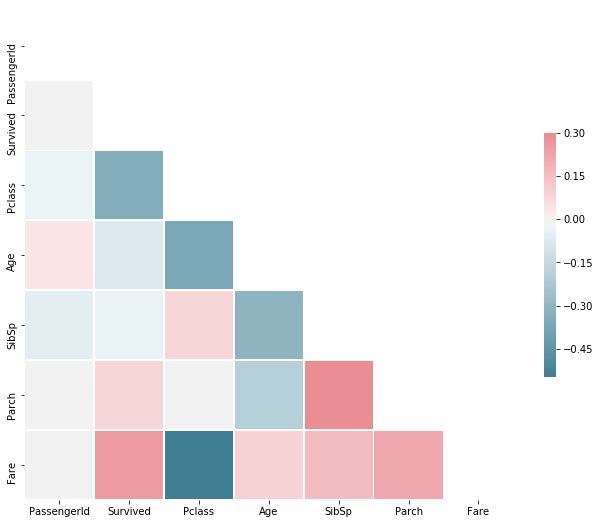

In [29]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})